In [1]:
%config Completer.use_jedi = False
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split,GridSearchCV
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from sklearn.metrics import classification_report,accuracy_score,b
from keras.wrappers.scikit_learn import KerasClassifier
from keras.constraints import maxnorm

Using TensorFlow backend.


In [2]:
age_data = np.load('numpy_files/age_data.npz')

In [3]:
X = age_data['X']
y = age_data['y']

In [4]:
X.shape

(23709, 50, 50, 3)

In [5]:
y.shape

(23709,)

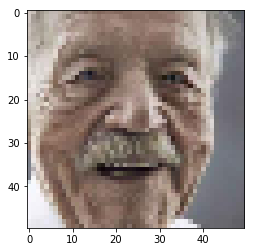

In [6]:
plt.imshow(X[0])

In [7]:
# Normalise the data
X = X/255
y = to_categorical(y,6)

In [8]:
# Split data to small size for parameter testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
X_test.shape

(4742, 50, 50, 3)

In [10]:
# Select data for validation
X_val = X_test[4200:]
y_val = y_test[4200:]

X_test = X_test[:4200]
y_test = y_test[:4200]

In [11]:
X_val.shape

(542, 50, 50, 3)

In [28]:
def create_model(activation='linear'):
    model = Sequential()

    model.add(Conv2D(filters=32, kernel_size=2,input_shape=(50,50,3), activation=activation,))
    model.add(MaxPooling2D(pool_size=2))

    model.add(Conv2D(filters=64, kernel_size=2,input_shape=(50,50,3), activation=activation,))
    model.add(MaxPooling2D(pool_size=2))

#     model.add(Conv2D(filters=64, kernel_size=2,input_shape=(50,50,3), activation=activation,))
#     model.add(MaxPooling2D(pool_size=2))

    # flatten array to 50*50
    model.add(Flatten())
    model.add(Dense(256))
    model.add(Activation(activation))
    
    # Prevent overfitting 
    model.add(Dropout(0.4))
    model.add(Dense(6))
    model.add(Activation('softmax'))

    model.compile(loss='categorical_crossentropy',
                 optimizer='adam',
                 metrics=['accuracy'])
    return model

In [16]:
model = create_model()

In [19]:
model.fit(X_train,
              y_train,
              epochs=5,
              batch_size=64,
              validation_data=(X_val, y_val))

Train on 18967 samples, validate on 542 samples
Epoch 1/5
18967/18967 [==============================] - 18s 975us/step - loss: 1.1798 - acc: 0.5591 - val_loss: 0.9071 - val_acc: 0.6476
Epoch 2/5
18967/18967 [==============================] - 19s 992us/step - loss: 0.9077 - acc: 0.6497 - val_loss: 0.8588 - val_acc: 0.6661
Epoch 3/5
18967/18967 [==============================] - 19s 1ms/step - loss: 0.8190 - acc: 0.6814 - val_loss: 0.7580 - val_acc: 0.7048
Epoch 4/5
18967/18967 [==============================] - 20s 1ms/step - loss: 0.7610 - acc: 0.7019 - val_loss: 0.7165 - val_acc: 0.7232
Epoch 5/5
18967/18967 [==============================] - 20s 1ms/step - loss: 0.7230 - acc: 0.7167 - val_loss: 0.6872 - val_acc: 0.7288


In [21]:
y_pred = model.predict_classes(X_test)
y_cat= to_categorical(y_pred,6)
print(f"Accuracy: {accuracy_score(y_cat,y_test)}")
print(f"Classification Report: \n{classification_report(y_cat,y_test)}")

Accuracy: 0.7309523809523809
Classification Report: 
             precision    recall  f1-score   support

          0       0.91      0.81      0.86       332
          1       0.63      0.65      0.64       298
          2       0.04      0.47      0.07        15
          3       0.90      0.77      0.83      2539
          4       0.56      0.61      0.58       881
          5       0.37      0.76      0.50       135

avg / total       0.79      0.73      0.76      4200



In [20]:
linear = create_model('linear')

In [23]:
linear.fit(X_train,
              y_train,
              epochs=5,
              batch_size=64,
              validation_data=(X_val, y_val))

Train on 18967 samples, validate on 542 samples
Epoch 1/5
18967/18967 [==============================] - 16s 866us/step - loss: 1.0211 - acc: 0.6146 - val_loss: 0.8446 - val_acc: 0.6716
Epoch 2/5
18967/18967 [==============================] - 17s 877us/step - loss: 0.7658 - acc: 0.6984 - val_loss: 0.7188 - val_acc: 0.7251
Epoch 3/5
18967/18967 [==============================] - 17s 880us/step - loss: 0.6868 - acc: 0.7307 - val_loss: 0.6326 - val_acc: 0.7675
Epoch 4/5
18967/18967 [==============================] - 17s 885us/step - loss: 0.6390 - acc: 0.7510 - val_loss: 0.6249 - val_acc: 0.7638
Epoch 5/5
18967/18967 [==============================] - 17s 888us/step - loss: 0.5956 - acc: 0.7668 - val_loss: 0.5915 - val_acc: 0.7804


In [29]:
y_pred = linear.predict_classes(X_test)
y_cat= to_categorical(y_pred,6)
print(f"Accuracy: {accuracy_score(y_cat,y_test)}")
print(f"Classification Report: \n{classification_report(y_cat,y_test)}")

Accuracy: 0.7621428571428571
Classification Report: 
             precision    recall  f1-score   support

          0       0.87      0.86      0.87       296
          1       0.67      0.67      0.67       308
          2       0.24      0.43      0.31       110
          3       0.91      0.81      0.85      2436
          4       0.61      0.68      0.64       856
          5       0.51      0.73      0.60       194

avg / total       0.79      0.76      0.77      4200



Linear activation appears to greatly improve accuracy.

In [21]:
kernal_model =create_model(activation='linear')

In [22]:
kernal_model.fit(X_train,
              y_train,
              epochs=5,
              batch_size=64,
              validation_data=(X_val, y_val))

Train on 18967 samples, validate on 542 samples
Epoch 1/5
18967/18967 [==============================] - 16s 845us/step - loss: 1.0148 - acc: 0.6158 - val_loss: 0.8207 - val_acc: 0.6863
Epoch 2/5
18967/18967 [==============================] - 16s 844us/step - loss: 0.7718 - acc: 0.6970 - val_loss: 0.7409 - val_acc: 0.7066
Epoch 3/5
18967/18967 [==============================] - 17s 884us/step - loss: 0.7012 - acc: 0.7308 - val_loss: 0.6495 - val_acc: 0.7565
Epoch 4/5
18967/18967 [==============================] - 17s 909us/step - loss: 0.6446 - acc: 0.7459 - val_loss: 0.6379 - val_acc: 0.7343
Epoch 5/5
18967/18967 [==============================] - 16s 867us/step - loss: 0.6088 - acc: 0.7585 - val_loss: 0.6768 - val_acc: 0.7288


In [23]:
y_pred = kernal_model.predict_classes(X_test)
y_cat= to_categorical(y_pred,6)
print(f"Accuracy: {accuracy_score(y_cat,y_test)}")
print(f"Classification Report: \n{classification_report(y_cat,y_test)}")

Accuracy: 0.7440476190476191
Classification Report: 
             precision    recall  f1-score   support

          0       0.84      0.89      0.86       277
          1       0.66      0.68      0.67       301
          2       0.40      0.34      0.36       229
          3       0.91      0.78      0.84      2538
          4       0.48      0.71      0.57       656
          5       0.53      0.73      0.62       199

avg / total       0.78      0.74      0.75      4200



In [95]:
kernal_model =create_model(activation='linear')
kernal_model.fit(X_train,
              y_train,
              epochs=10,
              batch_size=64,
              validation_data=(X_val, y_val))
y_pred = kernal_model.predict_classes(X_test)
y_cat= to_categorical(y_pred,6)
print(f"Accuracy: {accuracy_score(y_cat,y_test)}")
print(f"Classification Report: \n{classification_report(y_cat,y_test)}")

Train on 18967 samples, validate on 542 samples
Epoch 1/10
18967/18967 [==============================] - 17s 921us/step - loss: 1.0019 - acc: 0.6193 - val_loss: 0.8170 - val_acc: 0.6827
Epoch 2/10
18967/18967 [==============================] - 16s 869us/step - loss: 0.7634 - acc: 0.7035 - val_loss: 0.7185 - val_acc: 0.7085
Epoch 3/10
18967/18967 [==============================] - 17s 886us/step - loss: 0.6889 - acc: 0.7297 - val_loss: 0.6891 - val_acc: 0.7325
Epoch 4/10
18967/18967 [==============================] - 17s 892us/step - loss: 0.6394 - acc: 0.7477 - val_loss: 0.6659 - val_acc: 0.7343
Epoch 5/10
18967/18967 [==============================] - 17s 898us/step - loss: 0.6025 - acc: 0.7600 - val_loss: 0.6264 - val_acc: 0.7694
Epoch 6/10
18967/18967 [==============================] - 17s 912us/step - loss: 0.5638 - acc: 0.7774 - val_loss: 0.6571 - val_acc: 0.7620
Epoch 7/10
18967/18967 [==============================] - 17s 901us/step - loss: 0.5338 - acc: 0.7894 - val_loss: 0.67

In [35]:
kernal_model =create_model(activation='linear')
kernal_model.fit(X_train,
              y_train,
              epochs=10,
              batch_size=64,
              validation_data=(X_val, y_val))

Train on 18967 samples, validate on 542 samples
Epoch 1/10
18967/18967 [==============================] - 18s 933us/step - loss: 1.0046 - acc: 0.6190 - val_loss: 0.8045 - val_acc: 0.6882
Epoch 2/10
18967/18967 [==============================] - 17s 900us/step - loss: 0.7625 - acc: 0.7029 - val_loss: 0.7446 - val_acc: 0.7048
Epoch 3/10
18967/18967 [==============================] - 17s 909us/step - loss: 0.6846 - acc: 0.7309 - val_loss: 0.7174 - val_acc: 0.7122
Epoch 4/10
18967/18967 [==============================] - 17s 908us/step - loss: 0.6347 - acc: 0.7481 - val_loss: 0.6488 - val_acc: 0.7399
Epoch 5/10
18967/18967 [==============================] - 17s 895us/step - loss: 0.5971 - acc: 0.7627 - val_loss: 0.6173 - val_acc: 0.7565
Epoch 6/10
18967/18967 [==============================] - 17s 900us/step - loss: 0.5618 - acc: 0.7786 - val_loss: 0.6435 - val_acc: 0.7472
Epoch 7/10
18967/18967 [==============================] - 17s 900us/step - loss: 0.5357 - acc: 0.7869 - val_loss: 0.60

In [36]:
y_pred = kernal_model.predict_classes(X_test)
y_cat= to_categorical(y_pred,6)
print(f"Accuracy: {accuracy_score(y_cat,y_test)}")
print(f"Classification Report: \n{classification_report(y_cat,y_test)}")

Accuracy: 0.7592857142857142
Classification Report: 
             precision    recall  f1-score   support

          0       0.85      0.88      0.87       284
          1       0.73      0.71      0.72       316
          2       0.37      0.49      0.42       144
          3       0.86      0.83      0.84      2246
          4       0.64      0.64      0.64       965
          5       0.60      0.67      0.63       245

avg / total       0.77      0.76      0.76      4200



In [105]:
img = cv2.imread('../test_images/female/30a.jpg')
img = cv2.resize(img,(50,50))
img =np.expand_dims(img, axis=0)
img = img/255


kernal_model.predict_classes(img)

array([3], dtype=int64)

In [106]:
kernal_model.save('age_estimator.h5')